In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [20]:
# Load and preprocess the data
# Read the data
df = pd.read_csv('/content/forestfires.csv')

# Display the first few rows of the dataset to understand its structure
df.head(), df.info()

# Select relevant numerical features for clustering
features = df[["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]]

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Display a sample of the normalized features
pd.DataFrame(normalized_features, columns=features.columns).head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202


In [21]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_features)

# Add DBSCAN cluster labels to the dataset for visualization
df['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_counts = np.unique(dbscan_labels, return_counts=True)


# Add DBSCAN cluster labels to the dataset for visualization
df['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_counts = np.unique(dbscan_labels, return_counts=True)

# Display the DBSCAN cluster counts
dbscan_cluster_counts

(array([-1,  0,  1]), array([ 50, 462,   5]))

In [22]:
# Apply KMeans with 3 clusters (based on initial DBSCAN insights)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# Add KMeans cluster labels to the dataset
df['KMeans_Cluster'] = kmeans_labels

# Count the number of points in each cluster
kmeans_cluster_counts = np.unique(kmeans_labels, return_counts=True)

# Display KMeans results summary
kmeans_cluster_counts

(array([0, 1, 2], dtype=int32), array([295, 110, 112]))

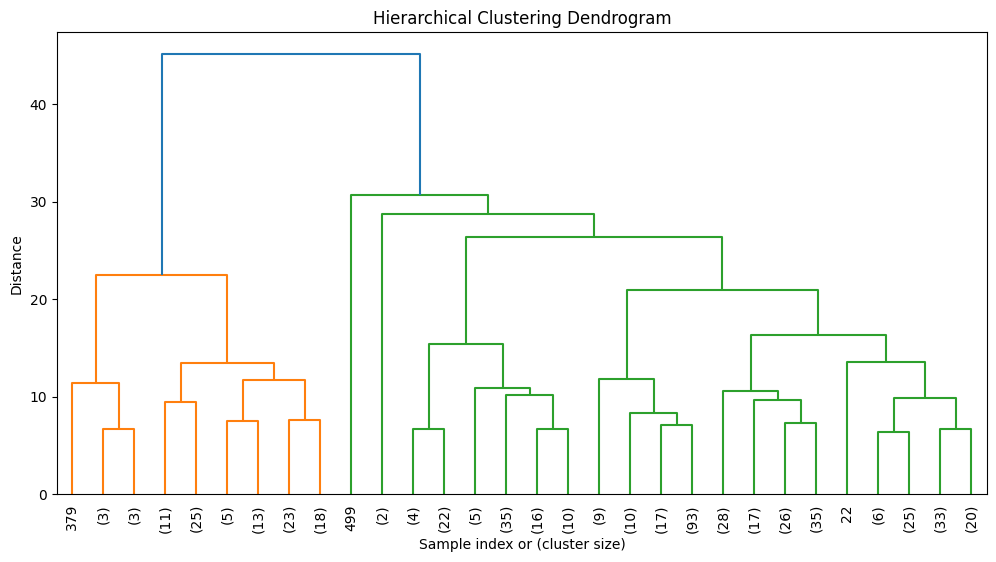

(array([1, 2, 3], dtype=int32), array([102, 414,   1]))

In [23]:
# Perform hierarchical clustering
hierarchical = linkage(normalized_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(hierarchical, truncate_mode="lastp", p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# Form clusters by cutting the dendrogram
hierarchical_labels = fcluster(hierarchical, t=3, criterion='maxclust')

# Add Hierarchical cluster labels to the dataset
df['Hierarchical_Cluster'] = hierarchical_labels

# Count the number of points in each cluster
hierarchical_cluster_counts = np.unique(hierarchical_labels, return_counts=True)

# Display Hierarchical Clustering results summary
hierarchical_cluster_counts

In [25]:
# Apply GMM with 3 components (based on other clustering results)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(normalized_features)

# Add GMM cluster labels to the dataset
df['GMM_Cluster'] = gmm_labels

# Count the number of points in each cluster
gmm_cluster_counts = np.unique(gmm_labels, return_counts=True)

# Display GMM results summary
gmm_cluster_counts

(array([0, 1, 2]), array([142,  11, 364]))

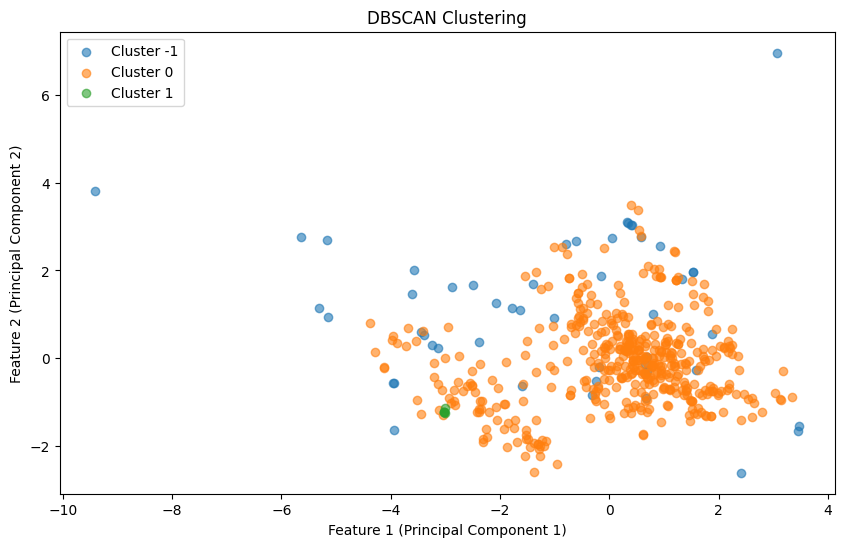

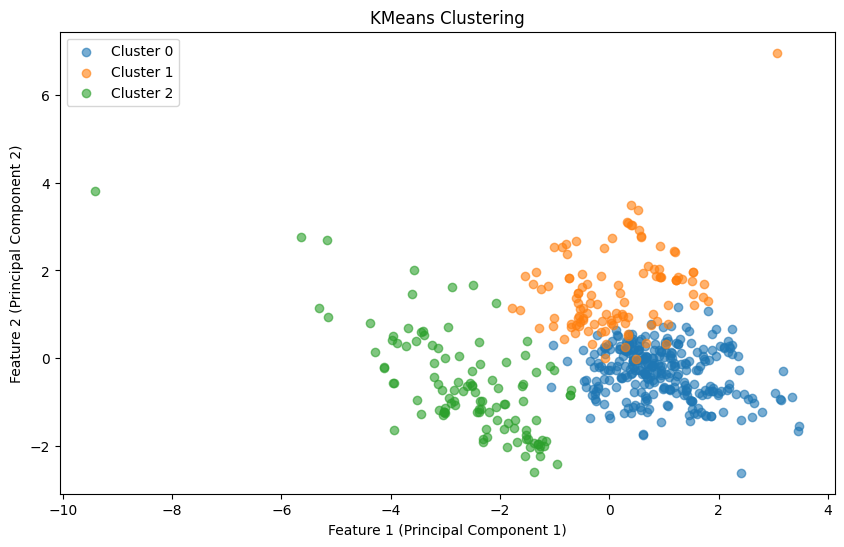

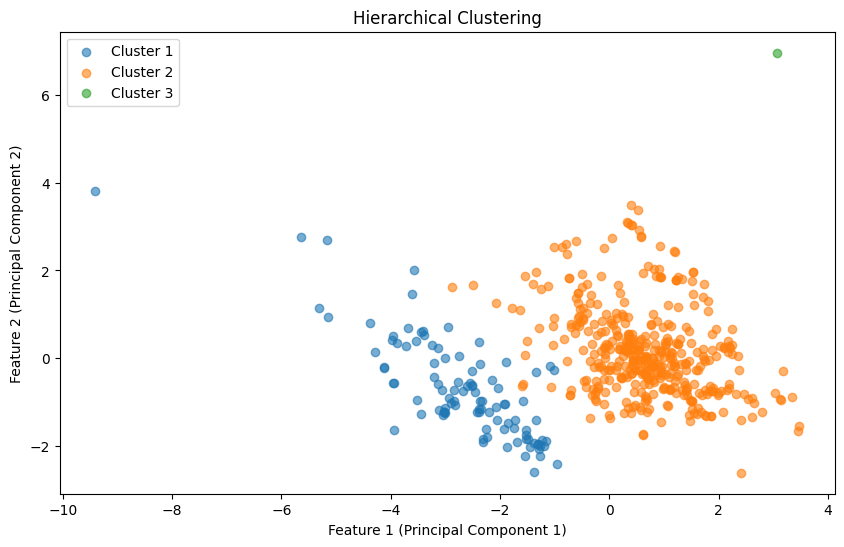

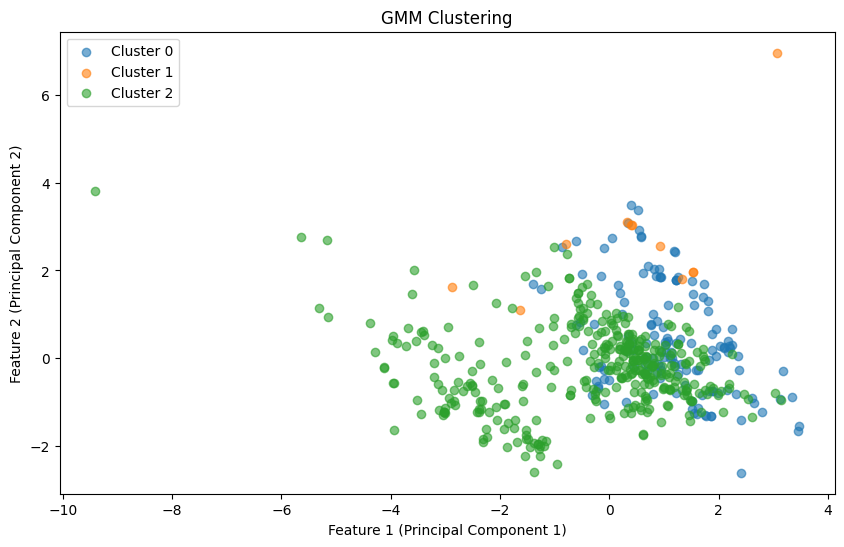

In [26]:
# Function for 2D visualization of clusters
def plot_clusters(features, labels, title, cluster_column_name):
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(labels):
        cluster_points = features[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)
    plt.title(title)
    plt.xlabel("Feature 1 (Principal Component 1)")
    plt.ylabel("Feature 2 (Principal Component 2)")
    plt.legend()
    plt.show()

# Reduce dimensionality to 2D for visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Visualize DBSCAN Clusters
plot_clusters(reduced_features, dbscan_labels, "DBSCAN Clustering", "DBSCAN_Cluster")

# Visualize KMeans Clusters
plot_clusters(reduced_features, kmeans_labels, "KMeans Clustering", "KMeans_Cluster")

# Visualize Hierarchical Clustering
plot_clusters(reduced_features, hierarchical_labels, "Hierarchical Clustering", "Hierarchical_Cluster")

# Visualize GMM Clusters
plot_clusters(reduced_features, gmm_labels, "GMM Clustering", "GMM_Cluster")